# Ordinary Least Squares


## Name: <span style="color:blue"> *Azaan Patil* </span>

In [131]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Loading

In [132]:
df = pd.read_csv("../Data/House_listings_dataset.csv")

df = df.rename(columns={
    'Bedroom': 'bed',
    'Bathroom': 'bath',
    'ConvertedLot': 'acre_lot',
    'Area': 'house_size',
    'State': 'state',
    'Price': 'price'
})

df['property_type'] = df['City']
df = df.dropna(subset=['bed', 'bath', 'acre_lot', 'house_size', 'state', 'price'])

class DataBundle:
    def __init__(self, data, target, feature_names):
        self.data = data
        self.target = target
        self.feature_names = feature_names

numeric_features = ['bed', 'bath', 'acre_lot', 'house_size']
categorical_features = ['state', 'property_type']
target_name = 'price'

features = numeric_features + categorical_features
X_df = df[features].copy()
y_series = df[target_name].copy()

house_data = DataBundle(
    data=X_df,
    target=y_series,
    feature_names=features
)

Accessing individual data

In [133]:
display(house_data.data)

,bed,bath,acre_lot,house_size,state,property_type
0,4.0,2.0,0.38050,1614.0,AL,Saraland
1,3.0,2.0,0.67034,1474.0,AL,Southside
2,3.0,2.0,3.20000,1800.0,AL,Robertsdale
4,3.0,3.0,0.26000,2224.0,AL,Chelsea
6,3.0,2.0,0.20000,1564.0,AL,Montgomery
...,...,...,...,...,...,...
24516,2.0,1.0,20.00000,1112.0,WY,Burns
24517,2.0,3.0,0.03000,1232.0,WY,Cody
24518,2.0,2.0,1.42000,2016.0,WY,Dubois
24519,3.0,2.0,6.23000,2930.0,WY,Cheyenne


In [134]:
house_data.data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22012 entries, 0 to 24520
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bed            22012 non-null  float64
 1   bath           22012 non-null  float64
 2   acre_lot       22012 non-null  float64
 3   house_size     22012 non-null  float64
 4   state          22012 non-null  object 
 5   property_type  22012 non-null  object 
dtypes: float64(4), object(2)
memory usage: 1.2+ MB


In [135]:
house_data.data.describe()

,bed,bath,acre_lot,house_size
count,22012.000000,22012.000000,22012.000000,22012.000000
mean,3.412321,2.430522,9.892825,2136.545929
std,1.109264,1.191802,607.516523,1616.353298
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.174242,1404.000000
50%,3.000000,2.000000,0.300000,1860.000000
75%,4.000000,3.000000,0.960000,2484.000000
max,36.000000,30.000000,87517.000000,99990.000000


In [136]:
print("House Listings Dataset")
print("Features:")
for feat in house_data.feature_names:
    print(f"  - {feat}")
print(f"\nTarget: price")
print(f"Number of samples: {len(house_data.data)}")

House Listings Dataset
Features:
  - bed
  - bath
  - acre_lot
  - house_size
  - state
  - property_type

Target: price
Number of samples: 22012


In [137]:
house_data.target

0        239900.0
1             1.0
2        259900.0
4        335000.0
6        151000.0
           ...   
24516    375000.0
24517    297900.0
24518    530000.0
24519    575900.0
24520    329900.0
Name: price, Length: 22012, dtype: float64

## Visualizations

#### Scatter Plot


In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

house_df = pd.concat([house_data.data, house_data.target.to_frame()], axis=1)

display(house_df)

,bed,bath,acre_lot,house_size,state,property_type,price
0,4.0,2.0,0.38050,1614.0,AL,Saraland,239900.0
1,3.0,2.0,0.67034,1474.0,AL,Southside,1.0
2,3.0,2.0,3.20000,1800.0,AL,Robertsdale,259900.0
4,3.0,3.0,0.26000,2224.0,AL,Chelsea,335000.0
6,3.0,2.0,0.20000,1564.0,AL,Montgomery,151000.0
...,...,...,...,...,...,...,...
24516,2.0,1.0,20.00000,1112.0,WY,Burns,375000.0
24517,2.0,3.0,0.03000,1232.0,WY,Cody,297900.0
24518,2.0,2.0,1.42000,2016.0,WY,Dubois,530000.0
24519,3.0,2.0,6.23000,2930.0,WY,Cheyenne,575900.0


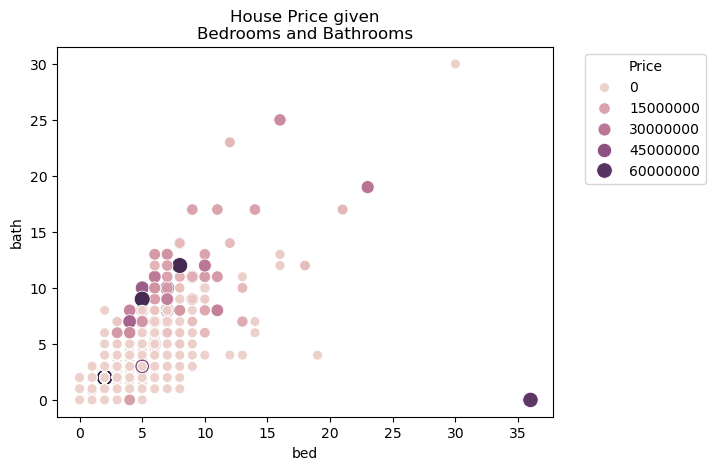

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
house_df = pd.concat([house_data.data, house_data.target.to_frame()], axis=1)
sns.scatterplot(
    data=house_df,
    x="bed", 
    y="bath", 
    hue="price", 
    size="price", 
    sizes=(50, 140)
)

plt.legend(title="Price", bbox_to_anchor=(1.05, 1), loc="upper left")
_ = plt.title("House Price given\nBedrooms and Bathrooms")
plt.show()


#### Target-Feature Scatter Matrix

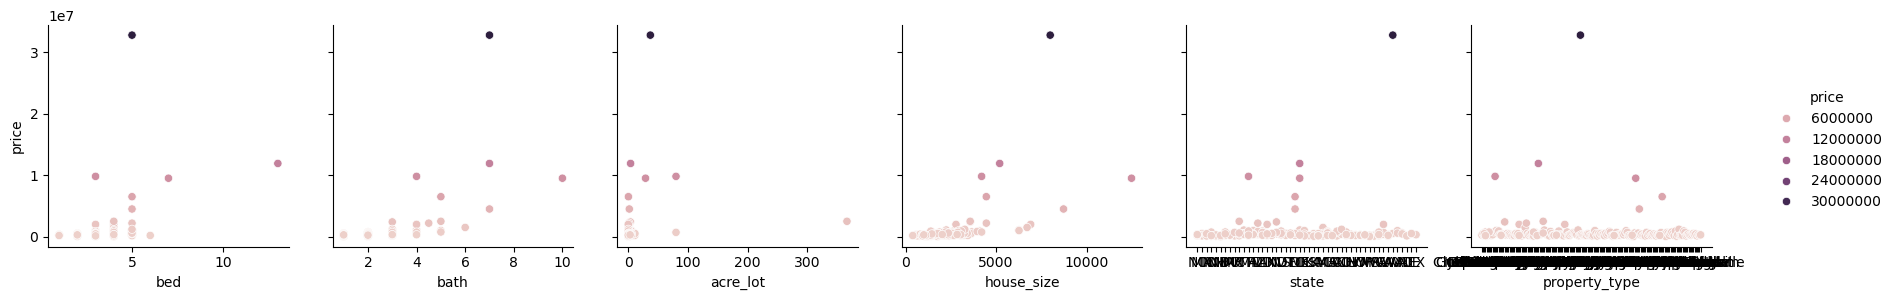

In [140]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
rng = np.random.RandomState(0)
indices = rng.choice(np.arange(len(house_df)), size=200, replace=False)

sns.pairplot(
    data=house_df.iloc[indices],
    x_vars=house_data.data.columns,
    y_vars=["price"],
    hue="price",
    height=3
)
plt.show()

### Data Splitting


#### Train and Test Splits

In [141]:
from sklearn.preprocessing import StandardScaler

numeric_features = ['bed', 'bath', 'acre_lot', 'house_size']
categorical_features = ['state', 'property_type']
features = numeric_features + categorical_features

X = house_df[features].copy()
y = house_df['price'].copy()

X = pd.get_dummies(X, columns=categorical_features, drop_first=True)
X = X.astype(float)

scaler = StandardScaler()
X[numeric_features] = scaler.fit_transform(X[numeric_features])

print(f"Features after preprocessing:")
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"X dtype: {X.dtypes.unique()}")
print(f"\nFeature columns: {list(X.columns)}")
display(X.head())

Features after preprocessing:
X shape: (22012, 5496)
y shape: (22012,)
X dtype: [dtype('float64')]

Feature columns: ['bed', 'bath', 'acre_lot', 'house_size', 'state_AL', 'state_AR', 'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DE', 'state_FL', 'state_GA', 'state_IA', 'state_ID', 'state_IL', 'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD', 'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT', 'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM', 'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA', 'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT', 'state_VA', 'state_VT', 'state_WA', 'state_WI', 'state_WV', 'state_WY', 'property_type_ALNA', 'property_type_Abbeville', 'property_type_Abbot', 'property_type_Aberdeen', 'property_type_Aberdeen City', 'property_type_Abilene', 'property_type_Abingdon', 'property_type_Abiquiu', 'property_type_Abita Springs', 'property_type_Absarokee', 'p

,bed,bath,acre_lot,house_size,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,...,property_type_Zebulon,property_type_Zeeland,property_type_Zephyr Cove,property_type_Zephyrhills,property_type_Zillah,property_type_Zimmerman,property_type_Zion,property_type_Zionsville,property_type_Zoe,property_type_Zwolle
0,0.529804,-0.361245,-0.015658,-0.323294,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.371715,-0.361245,-0.015181,-0.409911,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.371715,-0.361245,-0.011017,-0.208218,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.371715,0.477840,-0.015856,0.054107,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.371715,-0.361245,-0.015955,-0.354229,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [142]:
# TODO 5.1
from sklearn.model_selection import train_test_split

def get_train_test_data(
    X: np.ndarray, 
    y: np.ndarray, 
):
    """ Randomizes and then splits the data into train and test sets.

        Args:
            X: Data given as a 2D matrix

            y: Labels given as a vector 
    """
    assert isinstance(X, np.ndarray), f'`X` must be a NumPy array, got type {type(X)} instead.'
    assert isinstance(y, np.ndarray), f'`y` must be a NumPy array, got type {type(y)} instead.'
    # TODO 5.2
    X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_trn, y_trn, X_tst, y_tst
print(f"X_trn shape: {X_trn.shape}")
print(f"X_tst shape: {X_tst.shape}")
print(f"y_trn shape: {y_trn.shape}")
print(f"y_tst shape: {y_tst.shape}")

X_trn shape: (17609, 5497)
X_tst shape: (4403, 5497)
y_trn shape: (17609,)
y_tst shape: (4403,)


### Adding Bias Term

In [143]:
def add_bias(X: np.ndarray) -> np.ndarray:
    """ Add bias term to input features.

        Args:
            X: Input feature data given as a matrix.

        Return: 
            Matrix where first column contains the bias term
    """
    bias = np.ones((X.shape[0], 1))
    
    X1 = np.hstack([bias, X])
    
    return X1

### Get Preprocessed Data

In [144]:
def get_preprocessed_data() -> Tuple[np.ndarray]:
    """ Gets preprocessed data for training and testing
    
        IMPORTANT: Uses the preprocessed X and y (with categorical encoding and scaling)
        created in the "Feature Preprocessing" section above.

        Return:
            A tuple of NumPy arrays where the first two indices 
            contain the training data and targets and the last two
            indicies contain the testing data and targets.
            Each row of X includes a bias term as the first column.
    """
    X_trn, y_trn, X_tst, y_tst = get_train_test_data(
        X.to_numpy(),
        y.to_numpy()
    )
    
    X_trn = add_bias(X_trn)
    X_tst = add_bias(X_tst)
    
    return X_trn, y_trn, X_tst, y_tst

print(f"Training set shape: X_trn {X_trn.shape}, y_trn {y_trn.shape}")
print(f"Testing set shape:  X_tst {X_tst.shape}, y_tst {y_tst.shape}")
print(f"\nTotal samples: {len(y_trn) + len(y_tst)} (train: {len(y_trn)}, test: {len(y_tst)})") 
print(f"\nBias column (X_trn[:5, 0]): {X_trn[:5, 0]}")
print(f"Sample feature values (X_trn[0, 1:4]): {X_trn[0, 1:4]}")

Training set shape: X_trn (17609, 5497), y_trn (17609,)
Testing set shape:  X_tst (4403, 5497), y_tst (4403,)

Total samples: 22012 (train: 17609, test: 4403)

Bias column (X_trn[:5, 0]): [1. 1. 1. 1. 1.]
Sample feature values (X_trn[0, 1:4]): [ 0.52980448  0.4778404  -0.0161198 ]


##  SSE, MSE, RMSE 

$$
\text{SSE} = \sum_{n=1}^N \Big(\hat{y}_n - y_n \Big)^2.  \tag{1}
$$

$$
\text{MSE} = \frac{1}{N}\sum_{n=1}^N \Big(\hat{y}_n- y_n \Big)^2.  \tag{2}
$$

$$
\text{RMSE}  = \sqrt{\frac{1}{N}\sum_{n=1}^N (\hat{y}_n - y_n)^2} \tag{3}
$$ 

In [145]:
def sse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the sum of squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the SSE
    """
    y =  y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)
    
    return np.sum((y_hat - y) ** 2)

In [146]:
def mse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Computes the mean square error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the MSE
    """
    y =  y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)

    mse = np.mean((y_hat - y) ** 2)
    
    return mse

In [147]:
def rmse(y: np.ndarray, y_hat: np.ndarray) -> float:
    """ Compute the root means squared error

        Args:
            y: Ground truth targets given as a 1D vector

            y_hat: Predicted targets given as a 1D vector

        Return:
            A float corresponding to the RMSE
    """
    y =  y.reshape(-1,)
    y_hat = y_hat.reshape(-1,)
    rmse = np.sqrt(mse(y, y_hat))
    
    return rmse

## Ordinary Least Squares 

In [148]:
class OrdinaryLeastSquares():
    """ Perfroms ordinary least squares regression
    
        Attributes:
            w: The weights learned by using the normal equation

    """
    def __init__(self):
        self.w  = None
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> object:
        """ Train OLS to learn optimal weights

            Args:
                X: Training data given as a 2D matrix

                y: Training labels given as a 1D vector
                
            Return:
                The class's own object reference. 
        """
        self.w = np.linalg.pinv(X) @ y
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        """ Make predictions using learned weights

            Args:
                X: Testing data given as a 2D matrix

            Return:
                Returns a 1D vector of predictions for each data sample in X
        """
        
        return (X @ self.w).reshape(-1,)

In [149]:
X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()
ols = OrdinaryLeastSquares()
ols.fit(X_trn, y_trn)
y_tst_hat = ols.predict(X_tst)

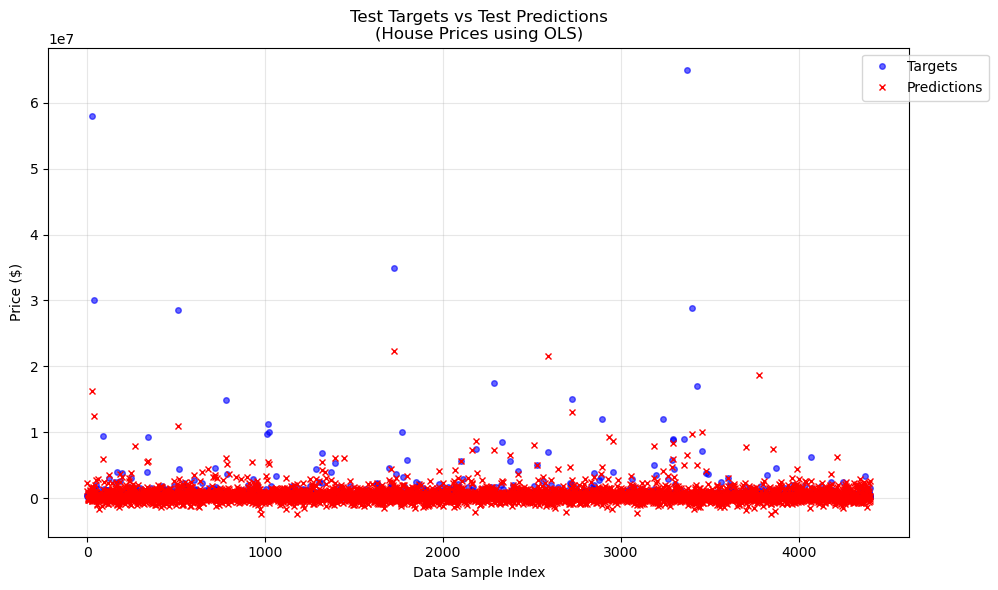

In [150]:
X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()

ols = OrdinaryLeastSquares()
ols.fit(X_trn, y_trn)

y_tst_hat = ols.predict(X_tst)

plt.figure(figsize=(10, 6))
plt.plot(y_tst, 'ob', label='Targets', markersize=4, alpha=0.6)  
plt.plot(y_tst_hat, 'xr', label='Predictions', markersize=4)  
plt.xlabel("Data Sample Index")
plt.ylabel("Price ($)")
plt.title("Test Targets vs Test Predictions\n(House Prices using OLS)")
plt.legend(bbox_to_anchor=(1.1, 1.00))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### SSE MSE, and RMSE Evaluation

In [151]:
X_trn, y_trn, X_tst, y_tst = get_preprocessed_data()

ols = OrdinaryLeastSquares()
ols.fit(X_trn, y_trn)
y_tst_hat = ols.predict(X_tst)

tst_sse = sse(y_tst, y_tst_hat)
tst_mse = mse(y_tst, y_tst_hat)
tst_rmse = rmse(y_tst, y_tst_hat)

print(f"Test SSE: {tst_sse}")
print(f"Test MSE: {tst_mse}")
print(f"Test RMSE (error in original units): {tst_rmse}")

Test SSE: 9833713866263482.0
Test MSE: 2233412188567.6772
Test RMSE (error in original units): 1494460.5008389072
